<a href="https://colab.research.google.com/github/programmingBae/UTS-ComputerVision/blob/main/UTS_CV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the Data

In [1]:
file_name = "sample_data/train_data.zip"

In [2]:
import zipfile
#import dependencies
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers, optimizers
import numpy as np
from matplotlib import pyplot as plt

In [3]:
with zipfile.ZipFile(file_name, "r") as zip:
  zip.extractall()
  print("Extract Done")

Extract Done


 ## Use ImageData Generator to split the dataset into train&validation set. Also to normalize the data

In [161]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    validation_split=0.1
    )

In [162]:
train_generator = train_datagen.flow_from_directory('train_data/train/', 
                                                    class_mode ='categorical', 
                                                    batch_size=5, target_size=(28, 28), 
                                                    color_mode ="grayscale", subset="training") 
train_generator.class_indices
validation_generator = train_datagen.flow_from_directory('train_data/train/', 
                                                         class_mode ='categorical', 
                                                         batch_size=5, target_size=(28, 28), 
                                                         color_mode ="grayscale", subset="validation") 



Found 576 images belonging to 4 classes.
Found 64 images belonging to 4 classes.


# Design the model

In [214]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(28,28, 1)),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),
    # The second convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
     
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(4, activation='softmax')
    ])

# Compile the model

In [215]:
model.compile(optimizer = "adam",
                loss = "categorical_crossentropy",
                metrics=["accuracy"])

In [204]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)

# Train

In [216]:
# Train your model
history = model.fit(train_generator,
                    epochs=50,
                    validation_data=validation_generator,
                    callbacks=[callback])


Epoch 1/50
116/116 [==============================] - 2s 9ms/step - loss: 1.3887 - accuracy: 0.2500 - val_loss: 1.3846 - val_accuracy: 0.2656
Epoch 2/50
116/116 [==============================] - 1s 7ms/step - loss: 1.3879 - accuracy: 0.2535 - val_loss: 1.3858 - val_accuracy: 0.2500
Epoch 3/50
116/116 [==============================] - 1s 7ms/step - loss: 1.3872 - accuracy: 0.2240 - val_loss: 1.3852 - val_accuracy: 0.3438
Epoch 4/50
116/116 [==============================] - 1s 7ms/step - loss: 1.3870 - accuracy: 0.2517 - val_loss: 1.3852 - val_accuracy: 0.3125
Epoch 5/50
116/116 [==============================] - 1s 7ms/step - loss: 1.3868 - accuracy: 0.2326 - val_loss: 1.3844 - val_accuracy: 0.3125
Epoch 6/50
116/116 [==============================] - 1s 7ms/step - loss: 1.3857 - accuracy: 0.2691 - val_loss: 1.3831 - val_accuracy: 0.2344
Epoch 7/50
116/116 [==============================] - 1s 7ms/step - loss: 1.3859 - accuracy: 0.2726 - val_loss: 1.3822 - val_accuracy: 0.3438
Epoch 

# Evaluate

In [217]:
train_acc = history.model.evaluate(train_generator)
val_acc = history.model.evaluate(validation_generator)

13/13 [==============================] - 0s 6ms/step - loss: 1.4988 - accuracy: 0.4219


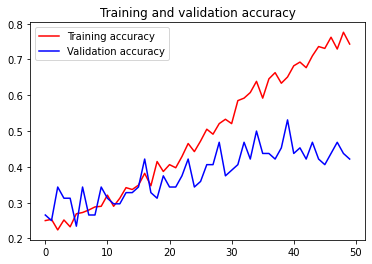

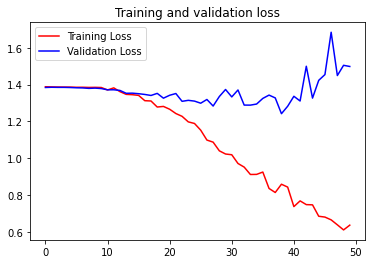

In [218]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()